In [83]:
import os
import pandas as pd
import cv2

DIR = "data/fungi_train_val"
directories = []

folders = os.listdir(DIR)

for folder in folders:
    photos = os.listdir(DIR + "/" + folder)
    cat = ' '.join(folder.split('_')[1:])
    super_cat = folder.split('_')[1]
    for photo in photos:
        path = DIR + "/" + folder + "/" + photo
        #img = cv2.imread(path)
        directories.append({
            'super_category': super_cat, 
            'category': cat, 
            'path': path
            #'height': img.shape[0],
            #'width': img.shape[1],
            #'colors': img.shape[2]
        })
        
df = pd.DataFrame(directories)
df

,super_category,category,path
0,Cortinarius,Cortinarius uliginosus f. uliginosus,data/fungi_train_val/12665_Cortinarius_uligino...
1,Cortinarius,Cortinarius uliginosus f. uliginosus,data/fungi_train_val/12665_Cortinarius_uligino...
2,Cortinarius,Cortinarius uliginosus f. uliginosus,data/fungi_train_val/12665_Cortinarius_uligino...
3,Cortinarius,Cortinarius uliginosus f. uliginosus,data/fungi_train_val/12665_Cortinarius_uligino...
4,Cortinarius,Cortinarius uliginosus f. uliginosus,data/fungi_train_val/12665_Cortinarius_uligino...
...,...,...,...
89755,Cheilymenia,Cheilymenia granulata,data/fungi_train_val/12195_Cheilymenia_granula...
89756,Cheilymenia,Cheilymenia granulata,data/fungi_train_val/12195_Cheilymenia_granula...
89757,Cheilymenia,Cheilymenia granulata,data/fungi_train_val/12195_Cheilymenia_granula...
89758,Cheilymenia,Cheilymenia granulata,data/fungi_train_val/12195_Cheilymenia_granula...


In [76]:
df_categories = df.groupby(['category']).count().rename(columns={'path':'count'})[['count']]
df_categories = df_categories.sort_values(by='count', ascending=False)
df_categories

,count
category,
Plicatura crispa,442
Pluteus cervinus,419
Tricholoma scalpturatum,414
Xerocomellus chrysenteron,406
Mycena galericulata,375
...,...
Chamaemyces fracidus,6
Cortinarius quarciticus,6
Tremella versicolor,6


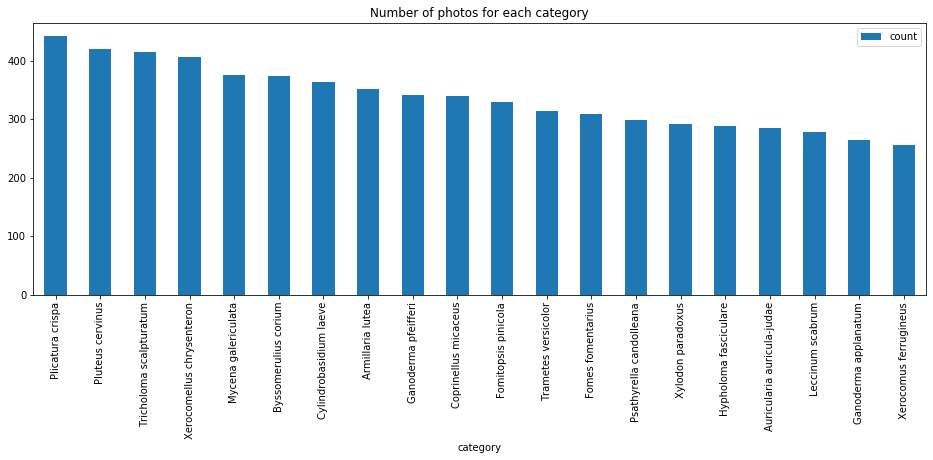

In [84]:
df_categories.head(20).plot.bar(title="Number of photos for each category", figsize=(16,5))

In [125]:
count_photos = df.groupby(['super_category']).count().rename(columns={'path':'count_photos'})[['count_photos']]
#count_photos = count_photos.sort_values(by='count_photos', ascending=False)

count_categories = df.drop(columns=['path']).drop_duplicates()
count_categories = count_categories.groupby(['super_category']).count().rename(columns={'category':'count_categories'})[['count_categories']]
#count_categories = count_categories.sort_values(by='count_categories', ascending=False)

df_super_categories = count_categories.join(count_photos)
df_super_categories

,count_categories,count_photos
super_category,,
Abortiporus,1,74
Achroomyces,1,27
Agaricus,22,1532
Agrocybe,5,414
Aleuria,1,75
...,...,...
Xerocomus,2,351
Xeromphalina,1,11
Xerula,1,8


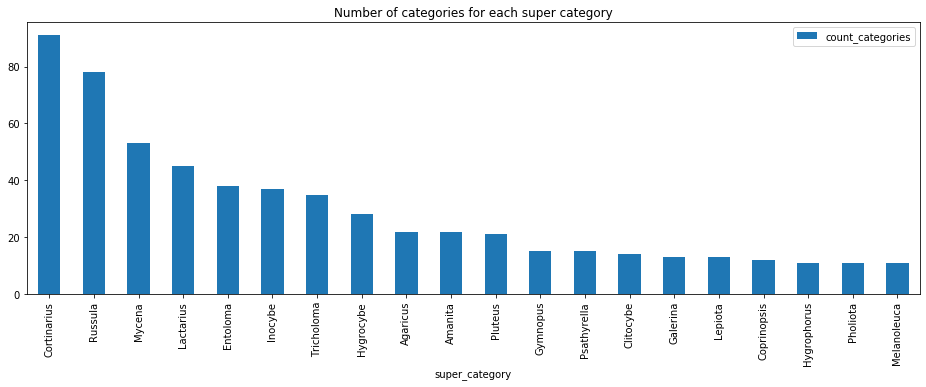

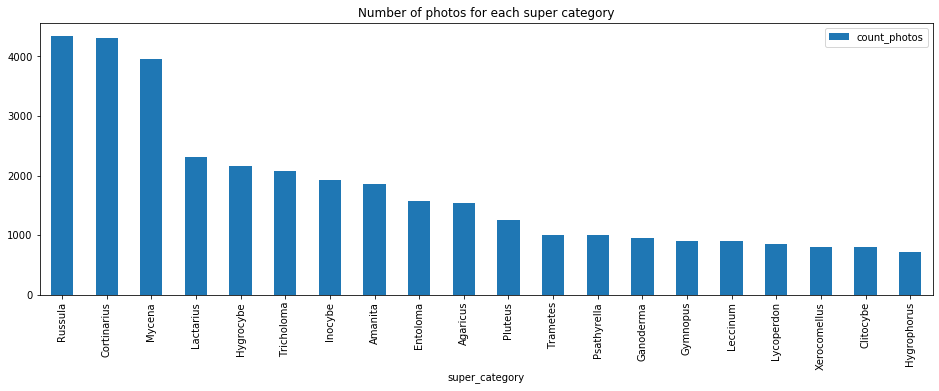

In [130]:
to_plot = df_super_categories[['count_categories']].sort_values(by='count_categories', ascending=False).head(20)
to_plot.plot.bar(title="Number of categories for each super category", figsize=(16,5))

to_plot = df_super_categories[['count_photos']].sort_values(by='count_photos', ascending=False).head(20)
to_plot.plot.bar(title="Number of photos for each super category", figsize=(16,5))